<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.231337,57.546755,-1343.049253,-1226.271161,969.099605,-2195.370765
1,0.0,1.0,44.635421,98.309901,1116.992919,1269.938242,2911.270738,-1641.332497
2,0.0,2.0,72.942335,65.497649,-5458.064868,-5309.624883,-176.445443,-5133.179440
3,0.0,3.0,21.852261,32.047894,-1105.604740,-1041.704585,1628.356607,-2670.061192
4,0.0,4.0,80.441727,20.507905,-541.981194,-431.031563,-2470.336729,2039.305167
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.968354,26.194768,-110.131701,-2.968579,-82.267825,79.299245
29996,999.0,26.0,75.449714,80.472893,994.473477,1160.396085,1280.535872,-120.139787
29997,999.0,27.0,87.208572,86.863456,5616.931710,5801.003738,1197.658925,4603.344813
29998,999.0,28.0,46.720435,81.500631,11674.139503,11812.360570,1930.611446,9881.749123


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    49.231337  57.546755  -1343.049253  -1226.271161   969.099605   
      1.0    44.635421  98.309901   1116.992919   1269.938242  2911.270738   
      2.0    72.942335  65.497649  -5458.064868  -5309.624883  -176.445443   
      3.0    21.852261  32.047894  -1105.604740  -1041.704585  1628.356607   
      4.0    80.441727  20.507905   -541.981194   -431.031563 -2470.336729   
...                ...        ...           ...           ...          ...   
999.0 25.0   70.968354  26.194768   -110.131701     -2.968579   -82.267825   
      26.0   75.449714  80.472893    994.473477   1160.396085  1280.535872   
      27.0   87.208572  86.863456   5616.931710   5801.003738  1197.658925   
      28.0   46.720435  81.500631  11674.139503  11812.360570  1930.611446   
      29.0   20.229406  94.099130   3203.258010   3327.586546  2843.407915   

                   e_hat  
rep   index               
0.0   0.0   -2195.370765  
      1.0   -1641.332497  
      2.0   -5133.179440  
      3.0   -2670.061192  
      4.0    2039.305167  
...                  ...  
999.0 25.0     79.299245  
      26.0   -120.139787  
      27.0   4603.344813  
      28.0   9881.749123  
      29.0    484.178632  

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    49.231337  57.546755  -1343.049253  -1226.271161   969.099605   
      1.0    44.635421  98.309901   1116.992919   1269.938242  2911.270738   
      2.0    72.942335  65.497649  -5458.064868  -5309.624883  -176.445443   
      3.0    21.852261  32.047894  -1105.604740  -1041.704585  1628.356607   
      4.0    80.441727  20.507905   -541.981194   -431.031563 -2470.336729   
...                ...        ...           ...           ...          ...   
999.0 25.0   70.968354  26.194768   -110.131701     -2.968579   -82.267825   
      26.0   75.449714  80.472893    994.473477   1160.396085  1280.535872   
      27.0   87.208572  86.863456   5616.931710   5801.003738  1197.658925   
      28.0   46.720435  81.500631  11674.139503  11812.360570  1930.611446   
      29.0   20.229406  94.099130   3203.258010   3327.586546  2843.407915   

                   e_hat  
rep   index               
0.0   0.0   -2195.370765  
      1.0   -1641.332497  
      2.0   -5133.179440  
      3.0   -2670.061192  
      4.0    2039.305167  
...                  ...  
999.0 25.0     79.299245  
      26.0   -120.139787  
      27.0   4603.344813  
      28.0   9881.749123  
      29.0    484.178632  

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.231337,57.546755,-1343.049253,-1226.271161,969.099605,-2195.370765
1,0.0,1.0,44.635421,98.309901,1116.992919,1269.938242,2911.270738,-1641.332497
2,0.0,2.0,72.942335,65.497649,-5458.064868,-5309.624883,-176.445443,-5133.179440
3,0.0,3.0,21.852261,32.047894,-1105.604740,-1041.704585,1628.356607,-2670.061192
4,0.0,4.0,80.441727,20.507905,-541.981194,-431.031563,-2470.336729,2039.305167
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.968354,26.194768,-110.131701,-2.968579,-82.267825,79.299245
29996,999.0,26.0,75.449714,80.472893,994.473477,1160.396085,1280.535872,-120.139787
29997,999.0,27.0,87.208572,86.863456,5616.931710,5801.003738,1197.658925,4603.344813
29998,999.0,28.0,46.720435,81.500631,11674.139503,11812.360570,1930.611446,9881.749123


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    49.231337  57.546755  -1343.049253  -1226.271161   969.099605   
      1.0    44.635421  98.309901   1116.992919   1269.938242  2911.270738   
      2.0    72.942335  65.497649  -5458.064868  -5309.624883  -176.445443   
      3.0    21.852261  32.047894  -1105.604740  -1041.704585  1628.356607   
      4.0    80.441727  20.507905   -541.981194   -431.031563 -2470.336729   
...                ...        ...           ...           ...          ...   
999.0 25.0   70.968354  26.194768   -110.131701     -2.968579   -82.267825   
      26.0   75.449714  80.472893    994.473477   1160.396085  1280.535872   
      27.0   87.208572  86.863456   5616.931710   5801.003738  1197.658925   
      28.0   46.720435  81.500631  11674.139503  11812.360570  1930.611446   
      29.0   20.229406  94.099130   3203.258010   3327.586546  2843.407915   

                   e_hat  
rep   index               
0.0   0.0   -2195.370765  
      1.0   -1641.332497  
      2.0   -5133.179440  
      3.0   -2670.061192  
      4.0    2039.305167  
...                  ...  
999.0 25.0     79.299245  
      26.0   -120.139787  
      27.0   4603.344813  
      28.0   9881.749123  
      29.0    484.178632  

[30000 rows x 6 columns]

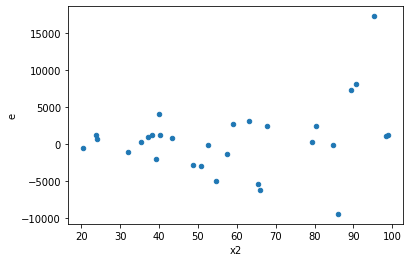

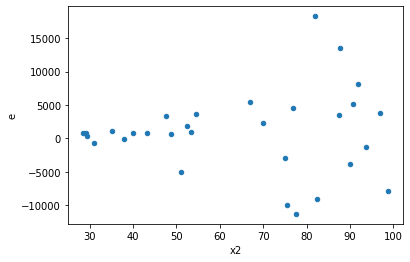

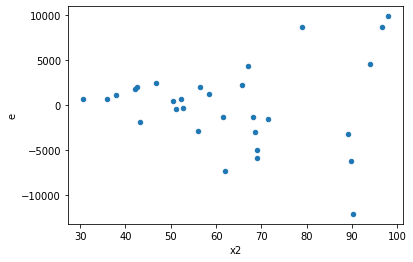

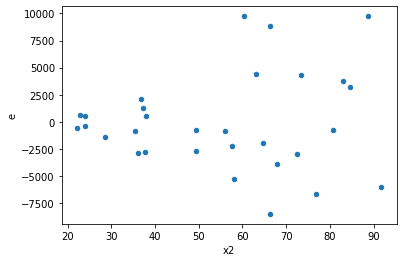

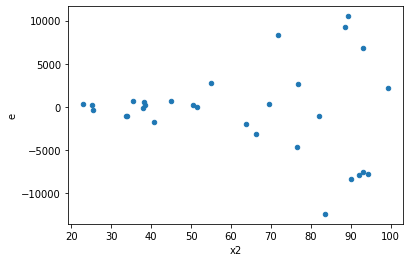

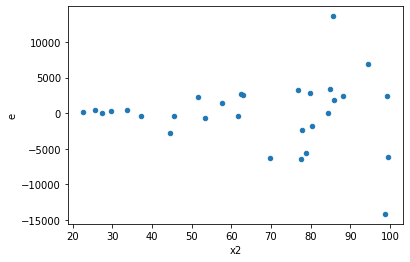

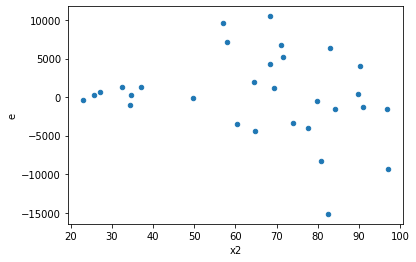

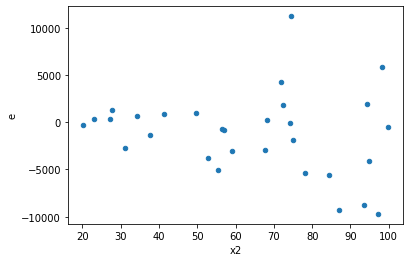

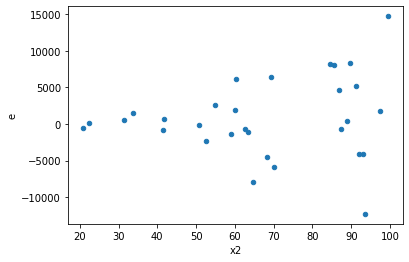

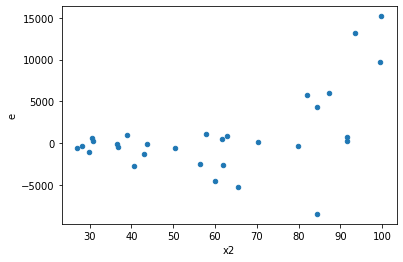

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,13.0,13.0,274474912.4838919,283519517.6177091,21113454.806453224,21809193.6629007,1.0329523928142177,0.954278688555946,0.522860655722027,0.477139344277973,Reject001=1 : Homoscedasticity
7.0,14.0,12.0,78967690.37822342,431095923.6783511,5640549.312730244,35924660.30652926,6.3690003073726045,0.0027163019801230703,0.9986418490099385,0.0013581509900615352,Reject001=0 : Heteroscedasticity
8.0,20.0,6.0,258288405.49728158,535592185.4089994,12914420.27486408,89265364.23483323,6.912069015484531,0.023869954618800815,0.9880650226905996,0.011934977309400407,Reject001=1 : Homoscedasticity
10.0,16.0,10.0,129843536.87338696,457968157.7529204,8115221.054586685,45796815.77529204,5.643323264670393,0.008548474769969339,0.9957257626150153,0.004274237384984669,Reject001=0 : Heteroscedasticity
11.0,13.0,13.0,141051384.79114616,272076812.0649673,10850106.522395859,20928985.54345902,1.9289198221472945,0.2493960309052894,0.8753019845473553,0.1246980154526447,Reject001=1 : Homoscedasticity
12.0,16.0,10.0,242312654.1167958,206163035.88644084,15144540.882299738,20616303.588644084,1.3613026468659408,0.6318704391476706,0.6840647804261647,0.3159352195738353,Reject001=1 : Homoscedasticity
14.0,12.0,14.0,12050856.89653468,1164640440.9681165,1004238.0747112232,83188602.92629404,82.8375312798368,1.4850343177386094e-10,0.9999999999257483,7.425171588693047e-11,Reject001=0 : Heteroscedasticity
15.0,15.0,11.0,136889221.61981988,409464500.4762048,9125948.107987992,37224045.4978368,4.078923642493034,0.023487940077225433,0.9882560299613873,0.011743970038612717,Reject001=1 : Homoscedasticity
17.0,19.0,7.0,191217700.77777076,264119249.93424946,10064089.514619514,37731321.41917849,3.749104314341442,0.0809037433563502,0.9595481283218249,0.0404518716781751,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,13.0,299965509.99320537,201244386.64075375,23074269.999477334,15480337.433904134,0.6708917523395014,0.4816788123986251,Reject001=1 : Homoscedasticity
1.0,12.0,14.0,968533369.9548438,54646706.30418496,80711114.16290365,3903336.16458464,0.04836181739117519,5.969213660056293e-06,Reject001=0 : Heteroscedasticity
2.0,15.0,11.0,305876000.25788575,141858702.30019033,20391733.35052572,12896245.663653666,0.6324251814189787,0.4034024622765468,Reject001=1 : Homoscedasticity
3.0,10.0,16.0,290125477.15817034,237528583.0881343,29012547.715817034,14845536.443008393,0.5116936502241379,0.2843708631826461,Reject001=1 : Homoscedasticity
4.0,11.0,15.0,369469523.5604979,285480629.34834915,33588138.50549981,19032041.95655661,0.5666298521854748,0.3455391457126639,Reject001=1 : Homoscedasticity
5.0,13.0,13.0,274474912.4838919,283519517.6177091,21113454.806453224,21809193.6629007,1.0329523928142177,0.954278688555946,Reject001=1 : Homoscedasticity
6.0,20.0,6.0,689714470.3700389,4639625.368767338,34485723.518501945,773270.8947945563,0.022422927980028852,3.0656818657019946e-10,Reject001=0 : Heteroscedasticity
7.0,14.0,12.0,78967690.37822342,431095923.6783511,5640549.312730244,35924660.30652926,6.3690003073726045,0.0027163019801230703,Reject001=0 : Heteroscedasticity
8.0,20.0,6.0,258288405.49728158,535592185.4089994,12914420.27486408,89265364.23483323,6.912069015484531,0.023869954618800815,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    519
Reject001=1 : Homoscedasticity      481
Name: Result_test, dtype: int64